In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\spoorthi NLP Project\surveyproject\ML project\ML_DATASET.csv')

In [3]:
df['performance_score'] = (df['avg_training_score'] / 100) + (df['KPIs_met_more_than_80'] * 0.5)

In [4]:
# Feature Engineering
df['training_efficiency'] = df['avg_training_score'] / (df['no_of_trainings'] + 1)
df['experience_rating_ratio'] = df['previous_year_rating'] / (df['length_of_service'] + 1)
df['awards_per_year'] = df['awards_won'] / (df['length_of_service'] + 1)

In [5]:
features = [
    'department', 'recruitment_channel', 'region', 'education', 'gender',
    'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won',
    'training_efficiency', 'experience_rating_ratio', 'awards_per_year'
]

X = df[features]
y = df['performance_score']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
categorical_cols = ['department', 'recruitment_channel', 'region', 'education', 'gender']
numerical_cols = list(set(X.columns) - set(categorical_cols))

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))
])
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical_cols),
    ('num', num_pipe, numerical_cols)
])

 R² Score: 0.3897504587863241
 MSE: 0.048669454722479924
 MAE: 0.19059397888238633
Accuracy: 76.54 %


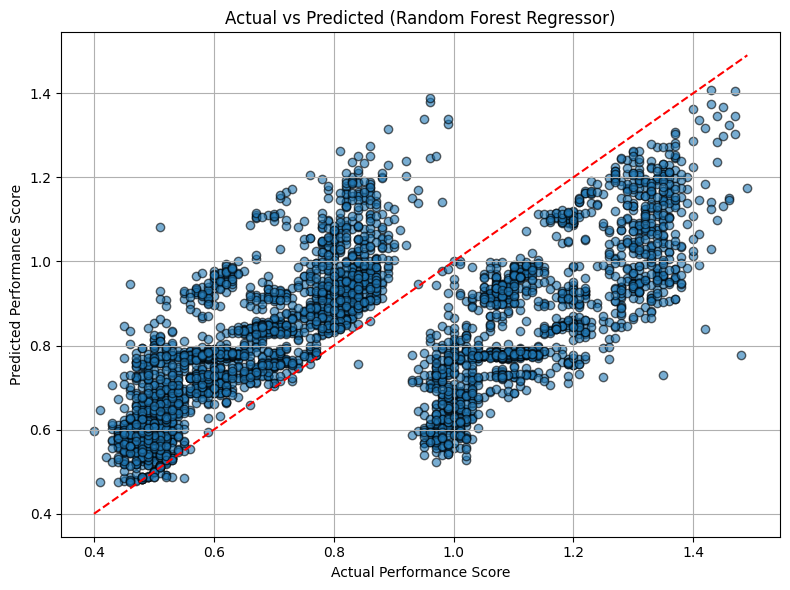

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

r2_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(" R² Score:",r2_rf)
print(" MSE:", mse_rf)
print(" MAE:", mae_rf)
accuracy_rf = 1 - (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test))
print("Accuracy:", round(accuracy_rf * 100, 2), "%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted (Random Forest Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


 R² Score: 0.37355602192936954
 MSE: 0.049961015564620126
 MAE: 0.19815799157631833
Accuracy: 75.61 %


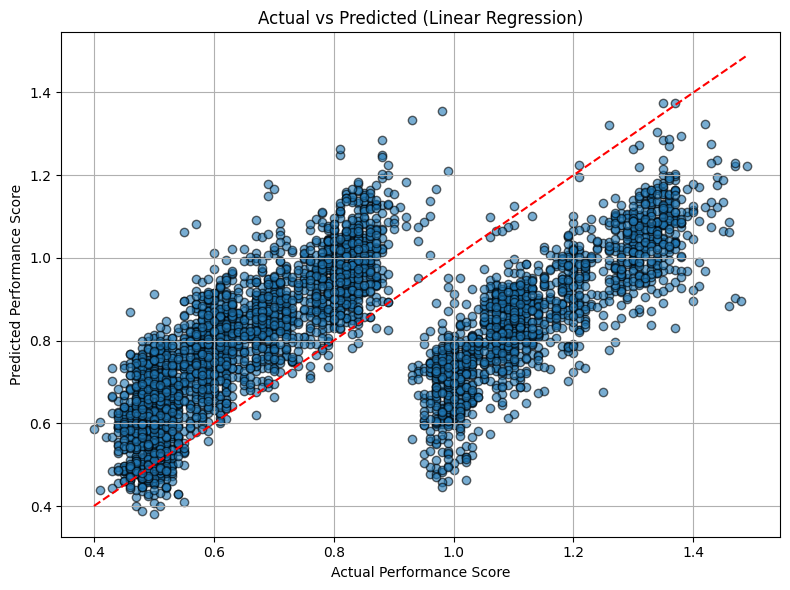

In [9]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

r2_linear = r2_score(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)

print(" R² Score:",r2_linear)
print(" MSE:", mse_linear)
print(" MAE:", mae_linear)
accuracy_linear = 1 - (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test))
print("Accuracy:", round(accuracy_linear * 100, 2), "%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


 R² Score: 0.37335043205107254
 MSE: 0.04997741204933239
 MAE: 0.18528742730771397
Accuracy: 77.19 %


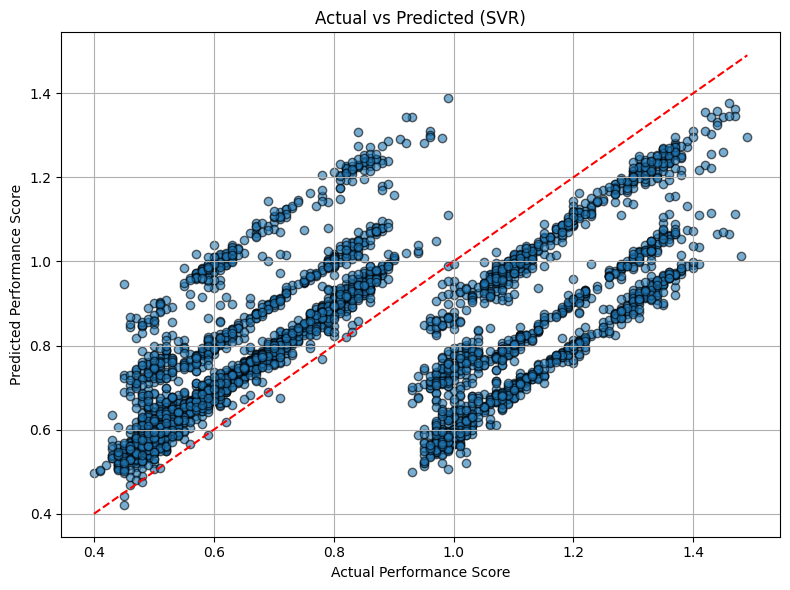

In [10]:
from sklearn.svm import SVR

svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # You can tune these if needed
])

svr_pipeline.fit(X_train, y_train)
y_pred = svr_pipeline.predict(X_test)

r2_svr = r2_score(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
mae_svr = mean_absolute_error(y_test, y_pred)

print(" R² Score:",r2_svr)
print(" MSE:", mse_svr)
print(" MAE:", mae_svr)
accuracy_svr = 1 - (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test))
print("Accuracy:", round(accuracy_svr * 100, 2), "%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted (SVR)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
results = {
    "Model": [
        "Linear Regression", 
        "Random Forest Regressor", 
        "SVR"
    ],
    "R2 Score": [
        r2_linear, 
        r2_rf, 
        r2_svr
    ],
    "MSE": [
        mse_linear, 
        mse_rf, 
        mse_svr
    ],
    "MAE": [
        mae_linear, 
        mae_rf, 
        mae_svr
    ],
    "Accuracy (%)": [
        accuracy_linear * 100, 
        accuracy_rf * 100, 
        accuracy_svr * 100
    ]
}

df_results = pd.DataFrame(results)

print(" Model Performance Comparison:")
display(df_results.sort_values(by="R2 Score", ascending=False).reset_index(drop=True))


 Model Performance Comparison:


,Model,R2 Score,MSE,MAE,Accuracy (%)
0,Random Forest Regressor,0.389750,0.048669,0.190594,76.540771
1,Linear Regression,0.373556,0.049961,0.198158,75.609756
2,SVR,0.373350,0.049977,0.185287,77.193927
